Using the fact $d$ dimensional linear classifiers for binary classification have a VC dimension $d$ the bounds derived using mutual information can be calculated.

In [90]:
import torch
from torch.optim import SGD, Adam
import torch.nn as nn


from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plt
import numpy as np

In [91]:
class LinearClassifier(torch.nn.Module):
  def __init__(self,d):
    super(LinearClassifier, self).__init__()
    self.linear = torch.nn.Linear(in_features=d, out_features=1, bias=False)

  def forward(self, x):
    x = self.linear(x)
    return x

In [92]:
def next_batch(inputs, targets, batchSize):
	for i in range(0, inputs.shape[0], batchSize):
		yield (inputs[i:i + batchSize], targets[i:i + batchSize])

In [93]:
def bound(d,n, LR, EPOCHS):
    if n>1000:
        BATCH_SIZE=50
    elif n>100:
        BATCH_SIZE=20
    elif n>10:
        BATCH_SIZE=5
    else:
        BATCH_SIZE=1

    X,y=make_blobs(n_samples=int(n/0.9), n_features=d, centers=2, random_state=1)

    X=X/max([np.linalg.norm(x) for x in X]) 

    (trainX, testX, trainY, testY) = train_test_split(X, y,test_size=0.1)
    trainX = torch.from_numpy(trainX).float()
    testX = torch.from_numpy(testX).float()
    trainY = torch.from_numpy(trainY).float()
    testY = torch.from_numpy(testY).float()

    model=LinearClassifier(d)

    opt = SGD(model.parameters(), lr=LR)
    lossFunc = nn.L1Loss()

    for epoch in range(0, EPOCHS):
        samples=0
        trainLoss = 0
        model.train()
        for (batchX, batchY) in next_batch(trainX, trainY, BATCH_SIZE):
            predictions = model(batchX)
            loss = lossFunc(predictions.view(-1), batchY)
            opt.zero_grad()
            loss.backward()
            opt.step()
            trainLoss += loss.item()
            samples+=len(batchY)
        if trainLoss<0.0001:
            break
    for (batchX, batchY) in next_batch(testX, testY, 1):
        samples_test=0
        testLoss=0
        with torch.no_grad():
            predictions = model(batchX)
            testLoss = lossFunc(predictions.view(-1), batchY)
            samples_test+=1
    print('Number of Samples: {} Train Loss {:.3f} Epochs {}'.format(n,trainLoss/samples,epoch))
    return trainLoss/samples, testLoss/samples_test, np.sqrt(d*np.log(n)/n)

Number of Samples: 1000 Train Loss 0.001 Epochs 199
Number of Samples: 1250 Train Loss 0.001 Epochs 199
Number of Samples: 1500 Train Loss 0.001 Epochs 199
Number of Samples: 1750 Train Loss 0.001 Epochs 199
Number of Samples: 2000 Train Loss 0.001 Epochs 199
Number of Samples: 2250 Train Loss 0.001 Epochs 199
Number of Samples: 2500 Train Loss 0.001 Epochs 199
Number of Samples: 2750 Train Loss 0.001 Epochs 199
Number of Samples: 3000 Train Loss 0.001 Epochs 199
Number of Samples: 3250 Train Loss 0.001 Epochs 199
Number of Samples: 3500 Train Loss 0.001 Epochs 199
Number of Samples: 3750 Train Loss 0.001 Epochs 199
Number of Samples: 4000 Train Loss 0.001 Epochs 199
Number of Samples: 4250 Train Loss 0.001 Epochs 199
Number of Samples: 4500 Train Loss 0.001 Epochs 199
Number of Samples: 4750 Train Loss 0.001 Epochs 199
Number of Samples: 5000 Train Loss 0.001 Epochs 199
Number of Samples: 5250 Train Loss 0.001 Epochs 199
Number of Samples: 5500 Train Loss 0.001 Epochs 199
Number of Sa

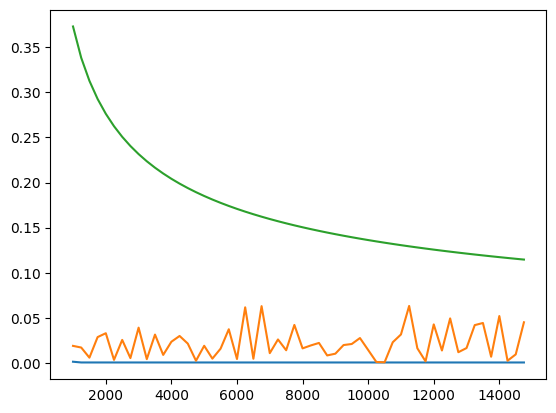

In [94]:
Ns=np.arange(1000,15000,step=250)
trainLosses=[]
testLosses=[]
bounds=[]
for n in Ns:
    trL,tsL,b=bound(20,n,0.01,200)
    trainLosses.append(trL)
    testLosses.append(tsL)
    bounds.append(b)
trainLosses=np.array(trainLosses)
testLosses=np.array(testLosses)
bounds=np.array(bounds)

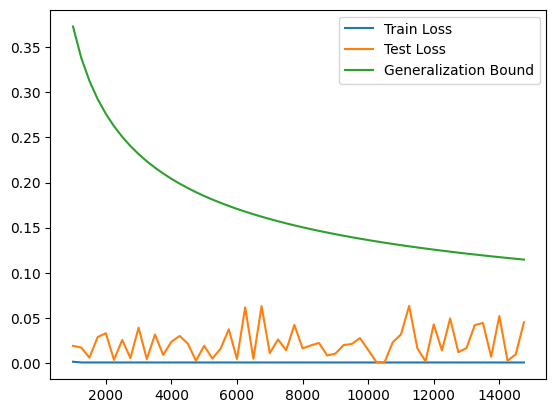

In [96]:
plt.plot(Ns,trainLosses,label='Train Loss')
plt.plot(Ns,testLosses,label='Test Loss')
plt.plot(Ns,trainLosses+bounds,label='Generalization Bound')
plt.legend()
plt.savefig('plots/MI_bounds.png')